# Partial Differentiation - From Scratch Tutorial
## Partial Differentiation ko Samjhte Hain Step by Step

Is notebook mein hum partial differentiation ko bilkul basics se seekhenge aur samjhenge ki iska geometric intuition kya hai.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from matplotlib import cm
import seaborn as sns

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
!pip install sympy


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## 1. Partial Differentiation Kya Hai?

### Basic Concept:
- **Normal Differentiation**: Ek variable ke function ka derivative (jaise f(x))
- **Partial Differentiation**: Multiple variables ke function ka derivative (jaise f(x,y))

**Example**: Agar aapka function hai `f(x,y) = x² + 3xy + y²`
- Partial derivative w.r.t x: ∂f/∂x (y ko constant maan kar)
- Partial derivative w.r.t y: ∂f/∂y (x ko constant maan kar)

### Symbol: ∂ (del)
- Ordinary derivative: df/dx
- Partial derivative: ∂f/∂x

## 2. Mathematical Definition

Agar f(x,y) ek function hai, toh:

**Partial derivative w.r.t x:**
```
∂f/∂x = lim(h→0) [f(x+h, y) - f(x, y)] / h
```

**Partial derivative w.r.t y:**
```
∂f/∂y = lim(h→0) [f(x, y+h) - f(x, y)] / h
```

**Key Point**: Ek variable ke sath differentiate karte waqt, baaki sab variables ko constant treat karte hain!

## 3. Step by Step Examples

### Example 1: Simple Function

In [4]:
# Symbolic computation ke liye sympy use karenge
x, y = sp.symbols('x y')

# Function define karte hain
f = x**2 + 3*x*y + y**2
print(f"Function f(x,y) = {f}")

# Partial derivatives calculate karte hain
partial_x = sp.diff(f, x)  # ∂f/∂x
partial_y = sp.diff(f, y)  # ∂f/∂y

print(f"\n∂f/∂x = {partial_x}")
print(f"∂f/∂y = {partial_y}")

# Manual calculation bhi dikhaते hain
print("\n--- Manual Calculation ---")
print("f(x,y) = x² + 3xy + y²")
print("\nFor ∂f/∂x (y ko constant maan kar):")
print("∂f/∂x = 2x + 3y + 0 = 2x + 3y")
print("\nFor ∂f/∂y (x ko constant maan kar):")
print("∂f/∂y = 0 + 3x + 2y = 3x + 2y")

Function f(x,y) = x**2 + 3*x*y + y**2

∂f/∂x = 2*x + 3*y
∂f/∂y = 3*x + 2*y

--- Manual Calculation ---
f(x,y) = x² + 3xy + y²

For ∂f/∂x (y ko constant maan kar):
∂f/∂x = 2x + 3y + 0 = 2x + 3y

For ∂f/∂y (x ko constant maan kar):
∂f/∂y = 0 + 3x + 2y = 3x + 2y


### Example 2: More Complex Function

In [5]:
# Complex function
g = x**3 * y**2 + sp.sin(x*y) + sp.exp(x + y)
print(f"Function g(x,y) = {g}")

# Partial derivatives
g_x = sp.diff(g, x)
g_y = sp.diff(g, y)

print(f"\n∂g/∂x = {g_x}")
print(f"∂g/∂y = {g_y}")

# Simplified form
print(f"\n∂g/∂x (simplified) = {sp.simplify(g_x)}")
print(f"∂g/∂y (simplified) = {sp.simplify(g_y)}")

Function g(x,y) = x**3*y**2 + exp(x + y) + sin(x*y)

∂g/∂x = 3*x**2*y**2 + y*cos(x*y) + exp(x + y)
∂g/∂y = 2*x**3*y + x*cos(x*y) + exp(x + y)

∂g/∂x (simplified) = 3*x**2*y**2 + y*cos(x*y) + exp(x + y)
∂g/∂y (simplified) = 2*x**3*y + x*cos(x*y) + exp(x + y)


## 4. Geometric Intuition - Sabse Important Part!

### Surface और Tangent Planes का Concept

**Imagine karo**: 
- Function f(x,y) ek 3D surface banata hai
- z = f(x,y) एक mountain की tarah hai
- Partial derivative उस mountain के slope ko bataता है specific direction mein

**∂f/∂x**: x-direction mein slope (y constant रखते हुए)
**∂f/∂y**: y-direction mein slope (x constant रखते हुए)

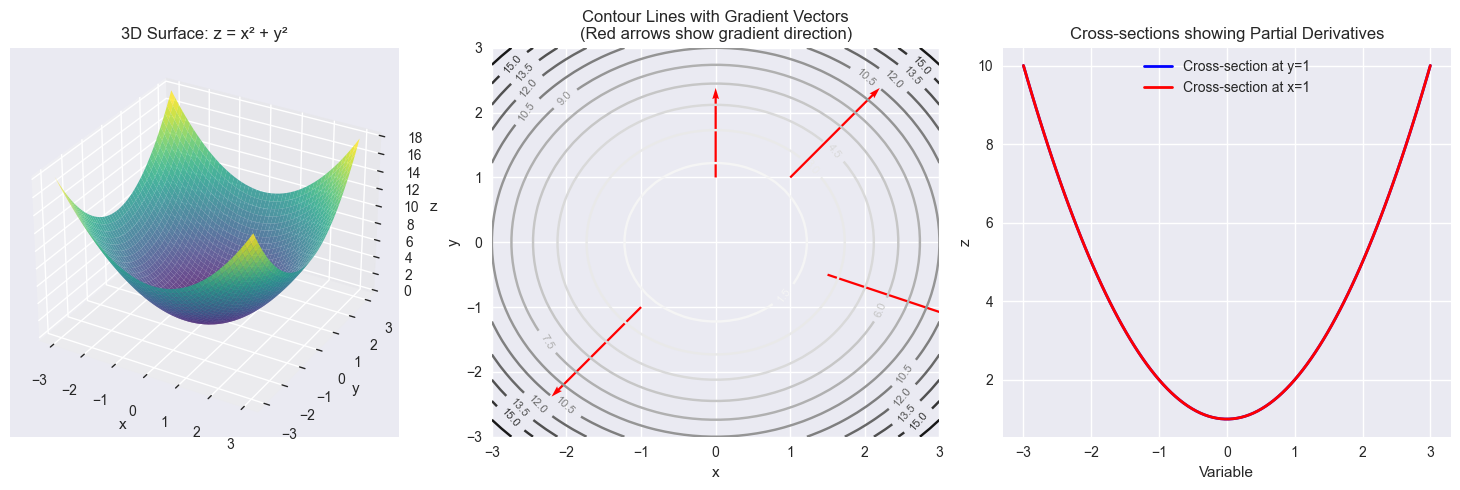

In [6]:
# 3D surface visualization
def plot_surface_and_derivatives():
    # Create mesh grid
    x_vals = np.linspace(-3, 3, 50)
    y_vals = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # Define function: z = x² + y²
    Z = X**2 + Y**2
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 5))
    
    # 3D surface plot
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8)
    ax1.set_title('3D Surface: z = x² + y²')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    
    # Contour plot with gradient vectors
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(X, Y, Z, levels=15)
    ax2.clabel(contour, inline=True, fontsize=8)
    
    # Add gradient vectors at few points
    x_sample = np.array([1, -1, 0, 1.5])
    y_sample = np.array([1, -1, 1, -0.5])
    
    # Partial derivatives: ∂z/∂x = 2x, ∂z/∂y = 2y
    dx = 2 * x_sample
    dy = 2 * y_sample
    
    ax2.quiver(x_sample, y_sample, dx, dy, color='red', scale=10, width=0.005)
    ax2.set_title('Contour Lines with Gradient Vectors\n(Red arrows show gradient direction)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.grid(True)
    
    # Cross-sections
    ax3 = fig.add_subplot(133)
    
    # Cross-section at y=1 (showing ∂f/∂x)
    x_cross = np.linspace(-3, 3, 100)
    z_cross_y1 = x_cross**2 + 1  # y=1 fixed
    ax3.plot(x_cross, z_cross_y1, 'b-', label='Cross-section at y=1', linewidth=2)
    
    # Cross-section at x=1 (showing ∂f/∂y)
    y_cross = np.linspace(-3, 3, 100)
    z_cross_x1 = 1 + y_cross**2  # x=1 fixed
    ax3.plot(y_cross, z_cross_x1, 'r-', label='Cross-section at x=1', linewidth=2)
    
    ax3.set_title('Cross-sections showing Partial Derivatives')
    ax3.set_xlabel('Variable')
    ax3.set_ylabel('z')
    ax3.legend()
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_surface_and_derivatives()

## 5. Real-Life Geometric Intuition

### Mountain Climbing Example (Pahad Chadna):

**Scenario**: Aap ek pahad par khade hain point (x₀, y₀) par

- **∂f/∂x**: Agar aap sirf East-West direction mein chalenge toh kitna steep hai
- **∂f/∂y**: Agar aap sirf North-South direction mein chalenge toh kitna steep hai

**Physical Meaning**:
- Positive partial derivative = Uphill (चढ़ाई)
- Negative partial derivative = Downhill (उतराई)
- Zero partial derivative = Flat surface (समतल)

Point P1 at (0, 0):
  Height: 9.84
  Slope East-West (∂f/∂x): -0.33
  Slope North-South (∂f/∂y): -0.16
  → Moving East se downhill jaoge
  → Moving North se downhill jaoge

Point P2 at (1, 0):
  Height: 7.05
  Slope East-West (∂f/∂x): -4.63
  Slope North-South (∂f/∂y): -0.74
  → Moving East se downhill jaoge
  → Moving North se downhill jaoge

Point P3 at (-1, 1):
  Height: 6.04
  Slope East-West (∂f/∂x): 2.97
  Slope North-South (∂f/∂y): -3.03
  → Moving East se uphill jaoge
  → Moving North se downhill jaoge

Point P4 at (2, 1):
  Height: 0.87
  Slope East-West (∂f/∂x): -2.87
  Slope North-South (∂f/∂y): -1.43
  → Moving East se downhill jaoge
  → Moving North se downhill jaoge



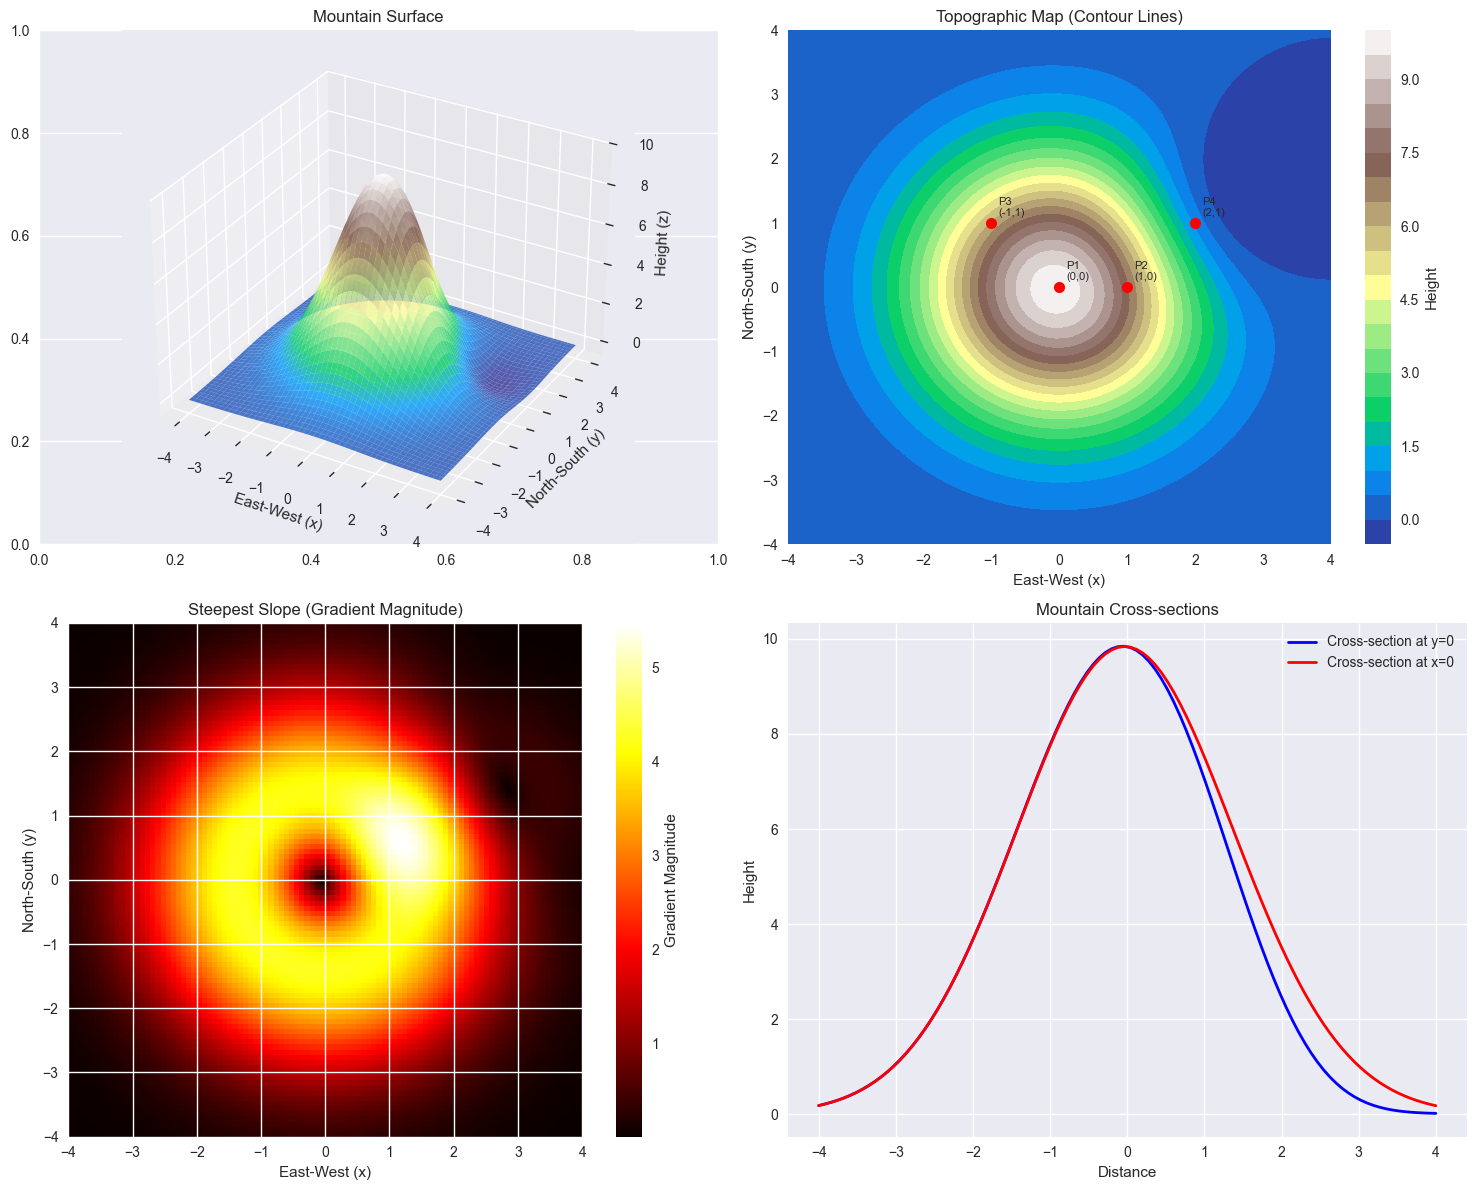

In [7]:
# Interactive example - Mountain climbing
def mountain_climbing_example():
    # Define a mountain-like function
    def mountain_func(x, y):
        return 10 * np.exp(-(x**2 + y**2)/4) - 2 * np.exp(-((x-2)**2 + (y-1)**2)/2)
    
    # Partial derivatives (numerical approximation)
    def partial_x(x, y, h=0.01):
        return (mountain_func(x+h, y) - mountain_func(x-h, y)) / (2*h)
    
    def partial_y(x, y, h=0.01):
        return (mountain_func(x, y+h) - mountain_func(x, y-h)) / (2*h)
    
    # Create grid
    x_range = np.linspace(-4, 4, 100)
    y_range = np.linspace(-4, 4, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = mountain_func(X, Y)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 3D mountain view
    ax1 = plt.subplot(221, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap=cm.terrain, alpha=0.8)
    ax1.set_title('Mountain Surface')
    ax1.set_xlabel('East-West (x)')
    ax1.set_ylabel('North-South (y)')
    ax1.set_zlabel('Height (z)')
    
    # Contour map with elevation
    ax2 = plt.subplot(222)
    contour = ax2.contourf(X, Y, Z, levels=20, cmap=cm.terrain)
    plt.colorbar(contour, ax=ax2, label='Height')
    ax2.set_title('Topographic Map (Contour Lines)')
    ax2.set_xlabel('East-West (x)')
    ax2.set_ylabel('North-South (y)')
    
    # Specific point analysis
    test_points = [(0, 0), (1, 0), (-1, 1), (2, 1)]
    
    for i, (px, py) in enumerate(test_points):
        height = mountain_func(px, py)
        slope_x = partial_x(px, py)
        slope_y = partial_y(px, py)
        
        ax2.plot(px, py, 'ro', markersize=8)
        ax2.annotate(f'P{i+1}\n({px},{py})', (px, py), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
        
        print(f"Point P{i+1} at ({px}, {py}):")
        print(f"  Height: {height:.2f}")
        print(f"  Slope East-West (∂f/∂x): {slope_x:.2f}")
        print(f"  Slope North-South (∂f/∂y): {slope_y:.2f}")
        
        if slope_x > 0:
            print(f"  → Moving East se uphill jaoge")
        elif slope_x < 0:
            print(f"  → Moving East se downhill jaoge")
        else:
            print(f"  → East-West direction mein flat hai")
            
        if slope_y > 0:
            print(f"  → Moving North se uphill jaoge")
        elif slope_y < 0:
            print(f"  → Moving North se downhill jaoge")
        else:
            print(f"  → North-South direction mein flat hai")
        print()
    
    # Gradient magnitude (steepest slope)
    ax3 = plt.subplot(223)
    gradient_mag = np.sqrt(partial_x(X, Y)**2 + partial_y(X, Y)**2)
    im = ax3.imshow(gradient_mag, extent=[-4, 4, -4, 4], origin='lower', cmap=cm.hot)
    plt.colorbar(im, ax=ax3, label='Gradient Magnitude')
    ax3.set_title('Steepest Slope (Gradient Magnitude)')
    ax3.set_xlabel('East-West (x)')
    ax3.set_ylabel('North-South (y)')
    
    # Cross-sections
    ax4 = plt.subplot(224)
    x_line = np.linspace(-4, 4, 100)
    y_fixed = 0
    z_cross = mountain_func(x_line, y_fixed)
    ax4.plot(x_line, z_cross, 'b-', linewidth=2, label=f'Cross-section at y={y_fixed}')
    
    y_line = np.linspace(-4, 4, 100)
    x_fixed = 0
    z_cross2 = mountain_func(x_fixed, y_line)
    ax4.plot(y_line, z_cross2, 'r-', linewidth=2, label=f'Cross-section at x={x_fixed}')
    
    ax4.set_title('Mountain Cross-sections')
    ax4.set_xlabel('Distance')
    ax4.set_ylabel('Height')
    ax4.legend()
    ax4.grid(True)
    
    plt.tight_layout()
    plt.show()

mountain_climbing_example()

## 6. Rules for Partial Differentiation

### Basic Rules (Same as ordinary differentiation, but for one variable at a time):

In [8]:
# Demonstrate partial differentiation rules
x, y, c = sp.symbols('x y c')

print("=== PARTIAL DIFFERENTIATION RULES ===")
print()

# Rule 1: Constant Rule
f1 = c
print(f"1. Constant Rule:")
print(f"   f(x,y) = {f1}")
print(f"   ∂f/∂x = {sp.diff(f1, x)}")
print(f"   ∂f/∂y = {sp.diff(f1, y)}")
print()

# Rule 2: Power Rule
f2 = x**3 * y**2
print(f"2. Power Rule:")
print(f"   f(x,y) = {f2}")
print(f"   ∂f/∂x = {sp.diff(f2, x)} (y² ko constant maan kar)")
print(f"   ∂f/∂y = {sp.diff(f2, y)} (x³ ko constant maan kar)")
print()

# Rule 3: Sum Rule
f3 = x**2 + y**2 + x*y
print(f"3. Sum Rule:")
print(f"   f(x,y) = {f3}")
print(f"   ∂f/∂x = {sp.diff(f3, x)}")
print(f"   ∂f/∂y = {sp.diff(f3, y)}")
print()

# Rule 4: Product Rule
f4 = (x**2 + 1) * (y**3 + y)
print(f"4. Product Rule:")
print(f"   f(x,y) = {f4}")
print(f"   ∂f/∂x = {sp.diff(f4, x)}")
print(f"   ∂f/∂y = {sp.diff(f4, y)}")
print()

# Rule 5: Chain Rule (with trigonometric functions)
f5 = sp.sin(x*y)
print(f"5. Chain Rule:")
print(f"   f(x,y) = {f5}")
print(f"   ∂f/∂x = {sp.diff(f5, x)}")
print(f"   ∂f/∂y = {sp.diff(f5, y)}")

=== PARTIAL DIFFERENTIATION RULES ===

1. Constant Rule:
   f(x,y) = c
   ∂f/∂x = 0
   ∂f/∂y = 0

2. Power Rule:
   f(x,y) = x**3*y**2
   ∂f/∂x = 3*x**2*y**2 (y² ko constant maan kar)
   ∂f/∂y = 2*x**3*y (x³ ko constant maan kar)

3. Sum Rule:
   f(x,y) = x**2 + x*y + y**2
   ∂f/∂x = 2*x + y
   ∂f/∂y = x + 2*y

4. Product Rule:
   f(x,y) = (x**2 + 1)*(y**3 + y)
   ∂f/∂x = 2*x*(y**3 + y)
   ∂f/∂y = (x**2 + 1)*(3*y**2 + 1)

5. Chain Rule:
   f(x,y) = sin(x*y)
   ∂f/∂x = y*cos(x*y)
   ∂f/∂y = x*cos(x*y)


## 7. Higher Order Partial Derivatives

### Second Order Partial Derivatives:
- **∂²f/∂x²**: x के respect mein दो बार differentiate
- **∂²f/∂y²**: y के respect mein दो बार differentiate  
- **∂²f/∂x∂y**: पहले x फिर y के respect mein differentiate
- **∂²f/∂y∂x**: पहले y फिर x के respect mein differentiate

**Important**: अगर function continuous है तो ∂²f/∂x∂y = ∂²f/∂y∂x (Clairaut's theorem)

In [9]:
# Higher order partial derivatives example
x, y = sp.symbols('x y')
f = x**4 + x**2*y**2 + y**4

print(f"Function: f(x,y) = {f}")
print()

# First order partial derivatives
fx = sp.diff(f, x)
fy = sp.diff(f, y)
print(f"First Order:")
print(f"∂f/∂x = {fx}")
print(f"∂f/∂y = {fy}")
print()

# Second order partial derivatives
fxx = sp.diff(fx, x)  # ∂²f/∂x²
fyy = sp.diff(fy, y)  # ∂²f/∂y²
fxy = sp.diff(fx, y)  # ∂²f/∂x∂y
fyx = sp.diff(fy, x)  # ∂²f/∂y∂x

print(f"Second Order:")
print(f"∂²f/∂x² = {fxx}")
print(f"∂²f/∂y² = {fyy}")
print(f"∂²f/∂x∂y = {fxy}")
print(f"∂²f/∂y∂x = {fyx}")
print()

# Verify Clairaut's theorem
print(f"Clairaut's Theorem Verification:")
print(f"∂²f/∂x∂y = ∂²f/∂y∂x? {fxy == fyx}")
print(f"Both are equal to: {fxy}")

Function: f(x,y) = x**4 + x**2*y**2 + y**4

First Order:
∂f/∂x = 4*x**3 + 2*x*y**2
∂f/∂y = 2*x**2*y + 4*y**3

Second Order:
∂²f/∂x² = 12*x**2 + 2*y**2
∂²f/∂y² = 2*x**2 + 12*y**2
∂²f/∂x∂y = 4*x*y
∂²f/∂y∂x = 4*x*y

Clairaut's Theorem Verification:
∂²f/∂x∂y = ∂²f/∂y∂x? True
Both are equal to: 4*x*y


## 8. Practical Applications

### Machine Learning में Partial Derivatives:
1. **Gradient Descent**: Cost function का gradient calculate करने के लिए
2. **Backpropagation**: Neural networks में weights update करने के लिए
3. **Optimization**: Minima/maxima find करने के लिए

In [10]:
# Machine Learning Example: Simple Linear Regression Cost Function
# Cost function: J(w,b) = (1/2m) * Σ(y_pred - y_actual)²
# where y_pred = w*x + b

def demonstrate_ml_application():
    # Symbolic variables
    w, b, x, y = sp.symbols('w b x y')
    m = sp.Symbol('m', positive=True)  # number of examples
    
    # Prediction function
    y_pred = w*x + b
    
    # Cost function (simplified for one example)
    cost = (y_pred - y)**2 / (2*m)
    
    print("=== MACHINE LEARNING APPLICATION ===")
    print(f"Prediction: y_pred = {y_pred}")
    print(f"Cost function: J(w,b) = {cost}")
    print()
    
    # Partial derivatives for gradient descent
    dJ_dw = sp.diff(cost, w)
    dJ_db = sp.diff(cost, b)
    
    print("Gradients for parameter updates:")
    print(f"∂J/∂w = {dJ_dw}")
    print(f"∂J/∂b = {dJ_db}")
    print()
    
    # Simplified forms
    print("Simplified (for understanding):")
    print(f"∂J/∂w = {sp.simplify(dJ_dw)}")
    print(f"∂J/∂b = {sp.simplify(dJ_db)}")
    print()
    
    print("Gradient Descent Update Rules:")
    print("w = w - α * (∂J/∂w)")
    print("b = b - α * (∂J/∂b)")
    print("where α is learning rate")

demonstrate_ml_application()

=== MACHINE LEARNING APPLICATION ===
Prediction: y_pred = b + w*x
Cost function: J(w,b) = (b + w*x - y)**2/(2*m)

Gradients for parameter updates:
∂J/∂w = x*(b + w*x - y)/m
∂J/∂b = (2*b + 2*w*x - 2*y)/(2*m)

Simplified (for understanding):
∂J/∂w = x*(b + w*x - y)/m
∂J/∂b = (b + w*x - y)/m

Gradient Descent Update Rules:
w = w - α * (∂J/∂w)
b = b - α * (∂J/∂b)
where α is learning rate


## 9. Practice Problems

### अब आप try करिए! (Now you try!)

In [11]:
# Practice problems - Solve these!
x, y = sp.symbols('x y')

print("=== PRACTICE PROBLEMS ===")
print("Solve these step by step:\n")

problems = [
    x**3 + y**3 + 3*x*y,
    sp.exp(x*y),
    sp.ln(x**2 + y**2),
    x**2*sp.sin(y) + y**2*sp.cos(x),
    (x**2 + y**2)**(3/2)
]

for i, prob in enumerate(problems, 1):
    print(f"Problem {i}: f(x,y) = {prob}")
    print(f"Find: ∂f/∂x and ∂f/∂y")
    print()

print("\n=== SOLUTIONS ===")
print("Uncomment the lines below to see solutions:\n")

# Uncomment to see solutions:
for i, prob in enumerate(problems, 1):
    fx = sp.diff(prob, x)
    fy = sp.diff(prob, y)
    print(f"Problem {i} Solution:")
    print(f"∂f/∂x = {fx}")
    print(f"∂f/∂y = {fy}")
    print()

=== PRACTICE PROBLEMS ===
Solve these step by step:

Problem 1: f(x,y) = x**3 + 3*x*y + y**3
Find: ∂f/∂x and ∂f/∂y

Problem 2: f(x,y) = exp(x*y)
Find: ∂f/∂x and ∂f/∂y

Problem 3: f(x,y) = log(x**2 + y**2)
Find: ∂f/∂x and ∂f/∂y

Problem 4: f(x,y) = x**2*sin(y) + y**2*cos(x)
Find: ∂f/∂x and ∂f/∂y

Problem 5: f(x,y) = (x**2 + y**2)**1.5
Find: ∂f/∂x and ∂f/∂y


=== SOLUTIONS ===
Uncomment the lines below to see solutions:

Problem 1 Solution:
∂f/∂x = 3*x**2 + 3*y
∂f/∂y = 3*x + 3*y**2

Problem 2 Solution:
∂f/∂x = y*exp(x*y)
∂f/∂y = x*exp(x*y)

Problem 3 Solution:
∂f/∂x = 2*x/(x**2 + y**2)
∂f/∂y = 2*y/(x**2 + y**2)

Problem 4 Solution:
∂f/∂x = 2*x*sin(y) - y**2*sin(x)
∂f/∂y = x**2*cos(y) + 2*y*cos(x)

Problem 5 Solution:
∂f/∂x = 3.0*x*(x**2 + y**2)**0.5
∂f/∂y = 3.0*y*(x**2 + y**2)**0.5



## 10. Summary और Key Points

### याद रखने वाली बातें:

1. **Definition**: Partial derivative मतलब एक variable के सापेक्ष derivative, बाकी को constant मान कर

2. **Notation**: 
   - ∂f/∂x (partial derivative)
   - df/dx (ordinary derivative)

3. **Geometric Intuition**: 
   - 3D surface का slope specific direction में
   - Mountain climbing analogy

4. **Applications**:
   - Machine Learning (Gradient Descent)
   - Physics (Field theory)
   - Economics (Optimization)

5. **Rules**: Same as ordinary differentiation, just treat other variables as constants

6. **Higher Order**: ∂²f/∂x∂y = ∂²f/∂y∂x (for continuous functions)

### Next Steps:
- Practice more problems
- Learn about gradients and directional derivatives
- Study applications in optimization
- Explore multivariable calculus further

In [ ]:
# Final interactive visualization
print("🎉 Congratulations! आपने Partial Differentiation सीख लिया!")
print("\nRemember: Practice makes perfect!")
print("Keep exploring और math ko enjoy करते रहिए! 📚🚀")